In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [58]:
from google.colab import files
upload=files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


In [59]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [61]:
df.rename(columns={'Annual Income (k$)':'Income',
                   'Spending Score (1-100)':'Score'},inplace=True)

In [62]:
df

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [63]:
df['Score'].nunique()

84

In [64]:
df['Score'].value_counts()

,count
Score,
42,8
55,7
73,6
46,6
48,5
...,...
68,1
85,1
23,1


In [65]:
df['Income'].nunique()

64

In [66]:
df['Income'].value_counts()

,count
Income,
54,12
78,12
60,6
48,6
63,6
...,...
101,2
113,2
120,2


In [67]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Income,0
Score,0


In [76]:
df.drop(['CustomerID'], axis=1, inplace=True, errors='ignore')

<Axes: >

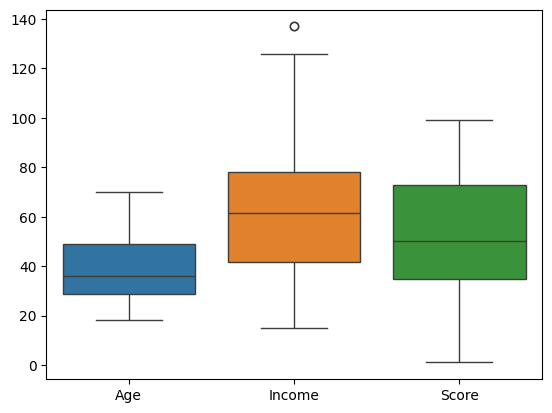

In [77]:
sns.boxplot(df)

In [80]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='if_binary', sparse_output=False)
df['Gender'] = ohe.fit_transform(df[['Gender']])[:, 0]

In [81]:
from sklearn.preprocessing import RobustScaler
sc=RobustScaler()
df=sc.fit_transform(df)
df=pd.DataFrame(df)
df.columns=['Gender','Age','Income','Score']
df

,Gender,Age,Income,Score
0,1.0,-0.839506,-1.273973,-0.287582
1,1.0,-0.740741,-1.273973,0.810458
2,0.0,-0.790123,-1.246575,-1.150327
3,0.0,-0.641975,-1.246575,0.705882
4,0.0,-0.246914,-1.219178,-0.261438
...,...,...,...,...
195,0.0,-0.049383,1.602740,0.758170
196,0.0,0.444444,1.767123,-0.575163
197,1.0,-0.197531,1.767123,0.627451
198,1.0,-0.197531,2.068493,-0.836601


In [82]:
X=df

In [83]:
wcss=[]
for k in range(1,11):
  from sklearn.cluster import KMeans
  kmeans=KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
print(wcss)

[337.7211135777367, 239.92960480139143, 192.03254504110245, 174.02920615469077, 131.4285153472249, 115.45334224529742, 103.54528737412578, 95.70800022621273, 89.7986970128476, 73.8784196246342]


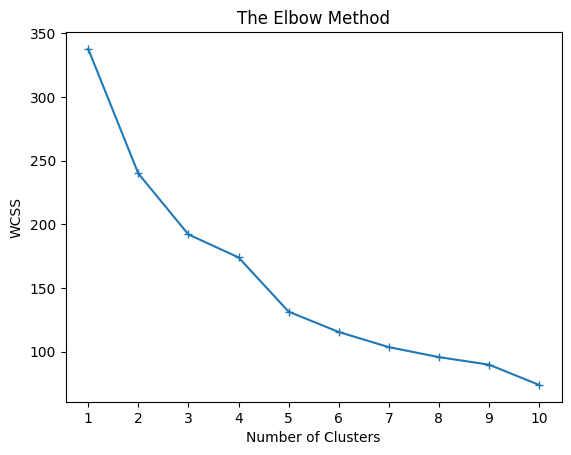

In [84]:
plt.plot(range(1,11),wcss,marker='+')
plt.xticks(range(1,11))
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [85]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=True)
X['KMeans_Clusters']=kmeans.fit_predict(X)

In [86]:
X

,Gender,Age,Income,Score,KMeans_Clusters
0,1.0,-0.839506,-1.273973,-0.287582,2
1,1.0,-0.740741,-1.273973,0.810458,2
2,0.0,-0.790123,-1.246575,-1.150327,0
3,0.0,-0.641975,-1.246575,0.705882,2
4,0.0,-0.246914,-1.219178,-0.261438,0
...,...,...,...,...,...
195,0.0,-0.049383,1.602740,0.758170,3
196,0.0,0.444444,1.767123,-0.575163,1
197,1.0,-0.197531,1.767123,0.627451,3
198,1.0,-0.197531,2.068493,-0.836601,1


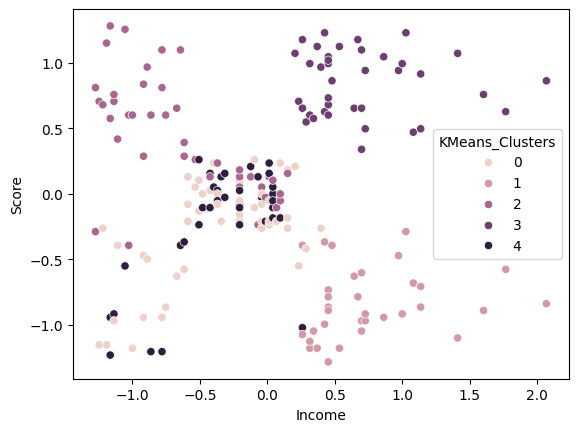

In [88]:
sns.scatterplot(x='Income', y='Score', hue='KMeans_Clusters', data=X)
plt.show()